#### Aplicação do modelo com o MobileNet como extrator no Linfoma ###
João Carvalho,
Daniel Costa,
Gabriel Conte

In [1]:
# importar bibliotecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import xgboost as xgb
import lightgbm as lgbm
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
# abrir dataset

dataset = pd.read_csv('D:\\archive\\features_lymphoma_MobileNet.csv')

In [3]:
# separar as colunas de dados e label

colunas_dados = []
for column in dataset.columns:
    if column != 'label':
        colunas_dados.append(column)
    else: 
        print("Achou")

X_full = dataset[colunas_dados]
Y_full = dataset['label']
X_full = np.array(X_full)
Y_full = np.array(Y_full)
np.random.shuffle(X_full)
np.random.shuffle(Y_full)

del dataset




Achou


In [4]:
# Separa em conjunto de teste e treino
x_train, x_test, y_train, y_test = train_test_split(X_full,Y_full,random_state=42,test_size=0.3)

del X_full, Y_full


C:\Users\garci\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy:  0.32622222222222225


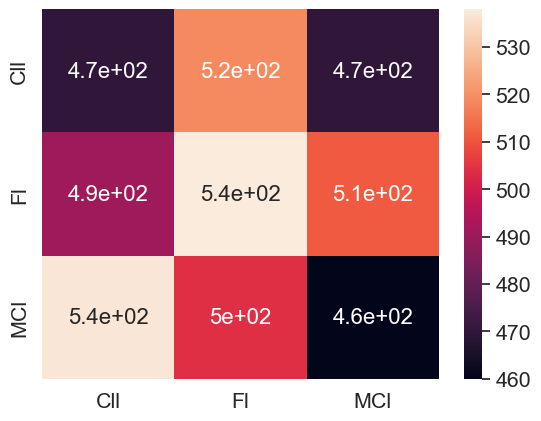

In [5]:
# aplicar LSVC
modelSVM = svm.LinearSVC()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['Cll','Fl','MCl'], yticklabels=['Cll','Fl','MCl']) # font size

acc = (matConf[0][0] + matConf[1][1] + matConf[2][2])/len(y_pred)
print("Accuracy: ", acc)

Accuracy:  0.3233333333333333


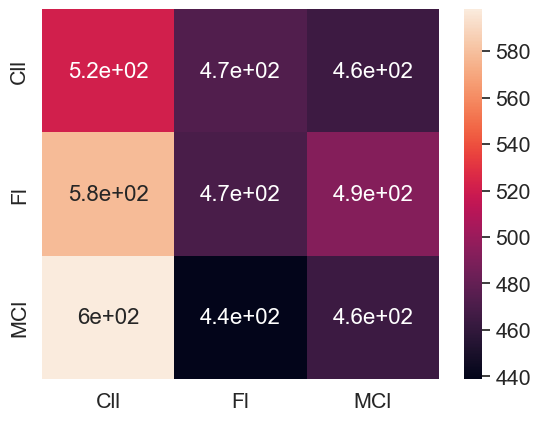

In [6]:
# aplicar RF
modelSVM = RandomForestClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['Cll','Fl','MCl'], yticklabels=['Cll','Fl','MCl']) # font size

acc = (matConf[0][0] + matConf[1][1] + matConf[2][2])/len(y_pred)
print("Accuracy: ", acc)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.770733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5015654
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 29689
[LightGBM] [Info] Start training from score -1.086966
[LightGBM] [Info] Start training from score -1.110107
[LightGBM] [Info] Start training from score -1.098898
Accuracy:  0.3288888888888889


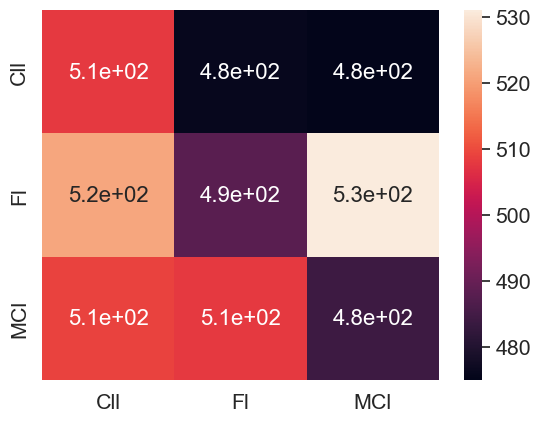

In [7]:
# aplicar LGBM
modelSVM = lgbm.LGBMClassifier()
modelSVM.fit(x_train,y_train)

y_pred = modelSVM.predict(x_test)

matConf = confusion_matrix(y_test, y_pred)

# plota a matrix de confusao
df_cm = pd.DataFrame(matConf, range(3), range(3))
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}, xticklabels=['Cll','Fl','MCl'], yticklabels=['Cll','Fl','MCl']) # font size

acc = (matConf[0][0] + matConf[1][1] + matConf[2][2])/len(y_pred)
print("Accuracy: ", acc)